In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in the excel input file

In [2]:
df = pd.read_excel('Week 1 Input.xlsx')
df.head()

,Dealership,Red Cars,Silver Cars,Black Cars,Blue Cars,When Sold Month,When Sold Year,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,A,451,325,377,396,1,2018,NaN,NaN,NaN,NaN
1,A,355,238,259,246,2,2018,NaN,NaN,NaN,NaN
2,A,124,456,303,175,3,2018,NaN,NaN,NaN,NaN
3,A,391,456,429,223,4,2018,NaN,NaN,NaN,NaN
4,A,139,177,241,376,5,2018,NaN,NaN,NaN,NaN


In [3]:
df = df.iloc[:,0:7]

#### Generate a Date column

In [4]:
df['Date'] = '01'+'/'+df['When Sold Month'].map(str)+'/'+df['When Sold Year'].map(str)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#### Remove unrequired columns

In [6]:
df = df.drop(['When Sold Month','When Sold Year'], axis=1)

In [7]:
df.head()

,Dealership,Red Cars,Silver Cars,Black Cars,Blue Cars,Date
0,A,451,325,377,396,2018-01-01
1,A,355,238,259,246,2018-02-01
2,A,124,456,303,175,2018-03-01
3,A,391,456,429,223,2018-04-01
4,A,139,177,241,376,2018-05-01


#### Extract Year and Month from Date

In [8]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [9]:
df.head()

,Dealership,Red Cars,Silver Cars,Black Cars,Blue Cars,Date,Year,Month
0,A,451,325,377,396,2018-01-01,2018,1
1,A,355,238,259,246,2018-02-01,2018,2
2,A,124,456,303,175,2018-03-01,2018,3
3,A,391,456,429,223,2018-04-01,2018,4
4,A,139,177,241,376,2018-05-01,2018,5


#### 1. Group By Month then Year then Dealership
#### 2. Find the total and reset index to flatten output
#### 3. Store in dataframe 'ans' and create new column 'Total'

In [11]:
ans = df.groupby(['Month','Year','Dealership'])['Red Cars','Silver Cars','Black Cars','Blue Cars'].sum().reset_index()

In [12]:
ans['Total']=ans['Red Cars']+ans['Silver Cars']+ans['Black Cars']+ans['Blue Cars']

In [13]:
ans.head()

,Month,Year,Dealership,Red Cars,Silver Cars,Black Cars,Blue Cars,Total
0,1,2018,A,451,325,377,396,1549
1,1,2018,B,235,313,363,417,1328
2,1,2019,A,367,180,255,107,909
3,1,2019,B,172,365,337,271,1145
4,2,2018,A,355,238,259,246,1098


In [14]:
totByYear = ans.groupby('Year')[['Total']].sum()
totByYear.reset_index(inplace=True)

In [30]:
totByYear

,Year,Total
0,2018,27016
1,2019,26214


(0, 40000)

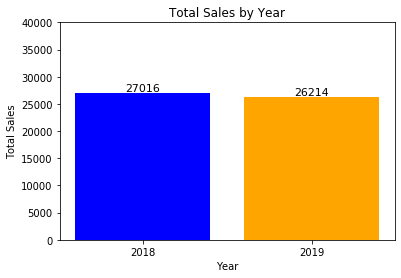

In [72]:
plt.figure()
plt.bar(totByYear['Year'].astype(str), totByYear['Total'], color=['blue','orange'])

for i, val in enumerate(totByYear['Total'].values):
    plt.text(i, val, int(val), 
             horizontalalignment='center', verticalalignment='bottom', color='black',
             fontdict={'fontweight':500, 'size':11})
    
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.ylim([0,40000])

(0, 40000)

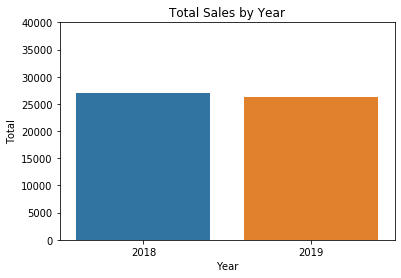

In [82]:
plt.figure(figsize=(6,4))
bp = sns.barplot(x='Year', y='Total', data=totByYear)
bp.set_title('Total Sales by Year')
bp.set_ylim(0,40000)

In [243]:
totByMonth = ans.groupby('Month')[['Total']].sum().reset_index()

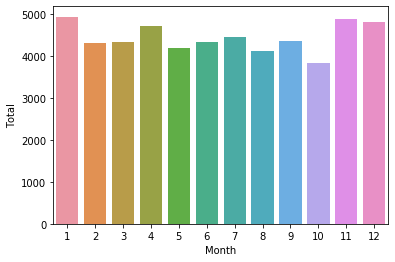

In [247]:
sns.barplot(x='Month', y='Total', data=totByMonth)

In [253]:
totByDealer = ans.groupby('Dealership')[['Total']].sum().reset_index()
totByDealer

,Dealership,Total
0,A,26161
1,B,27069


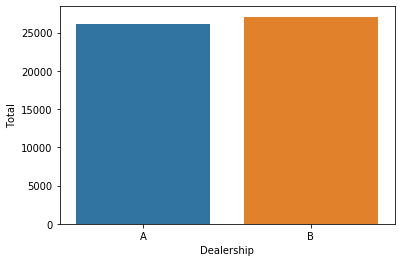

In [255]:
sns.barplot(x='Dealership', y='Total', data=totByDealer)